In [1]:
import os
import numpy as np
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt

In [61]:
%matplotlib inline
plt.rc("figure", dpi=100)
SMALL_SIZE = 10
BIGGER_SIZE = 11
plt.rc('font', size=BIGGER_SIZE)
plt.rc('axes', titlesize=BIGGER_SIZE)
plt.rc('axes', labelsize=BIGGER_SIZE)
plt.rc('axes', linewidth=.5)
plt.rc('xtick', labelsize=BIGGER_SIZE)
plt.rc('ytick', labelsize=BIGGER_SIZE)
plt.rc('legend', fontsize=SMALL_SIZE)
plt.rc('figure', titlesize=1)
plt.rcParams['xtick.major.size'] = 5
plt.rcParams['xtick.minor.size'] = 5
plt.rcParams['ytick.major.size'] = 5
plt.rcParams['ytick.minor.size'] = 5

In [7]:
data_path = Path("agnosticity_results/")
os.listdir(data_path)

['MSL_BlackBoxInfluenceFunctionDetector_RNN_results.csv',
 'MSL_InfluenceFunctionDetector_results.csv',
 'MSL_BlackBoxInfluenceFunctionDetector_LSTM_results.csv',
 'SMAP_BlackBoxInfluenceFunctionDetector_RNN_results.csv',
 'SMAP_InfluenceFunctionDetector_results.csv',
 'SMAP_BlackBoxInfluenceFunctionDetector_LSTM_results.csv']

In [11]:
datasets = ["SMAP", "MSL"]
win_size = 50
detectors = ["Influence Function", "RNN", "LSTM"]
metrics = ["AUC", "Elapsed Time(s)"]

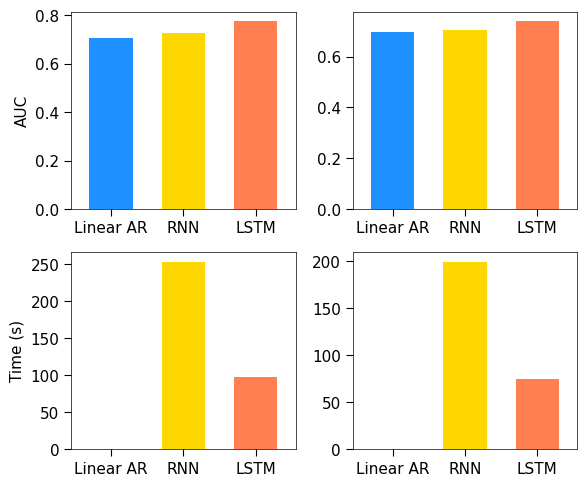

In [77]:
colors = ['dodgerblue', 'gold', 'coral']

fig, axes = plt.subplots(2, 2, figsize=(6,5))
for i, metric in enumerate(metrics):
    dataframes = []
    for j, dataset in enumerate(["SMAP", "MSL"]):
        for filename in os.listdir(data_path):
            if filename.split("_")[1] == "InfluenceFunctionDetector":
                detector_name = "Influence Function"
                df = pd.read_csv(data_path/f'{dataset}_InfluenceFunctionDetector_results.csv')
                df['Window_Size'] = win_size
                df['Detector'] = detector_name
                dataframes.append(df)
            else:
                detector_name = filename.split("_")[2]
                df = pd.read_csv(data_path/f'{dataset}_BlackBoxInfluenceFunctionDetector_{detector_name}_results.csv')
                df['Window_Size'] = win_size
                df['Detector'] = detector_name
                dataframes.append(df)
        combined_df = pd.concat(dataframes)
        grouped_df = combined_df.groupby(['Detector'])[metric].mean()
        grouped_df.plot(kind='bar', ax=axes[i,j], color=colors, width=0.6)
        grouped_df.columns = ["Influence Function", "LSTM", "RNN"]
        grouped_df = grouped_df.reindex(detectors)
        axes[i,j].set_xticklabels(detectors, rotation=360)
        axes[i,j].set_xlabel("")
        axes[0,0].set_ylabel("AUC")
        axes[1,0].set_ylabel("Time (s)")
        axes[i,j].set_xticklabels(["Linear AR", "RNN", "LSTM"])
plt.tight_layout()